<a href="https://colab.research.google.com/github/AkankshaB123/fraud_detection_mitigation/blob/main/Fraud_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT THE NECESSARY MODULES AND PACKAGES!**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")

Pandas Version: 2.2.2
Numpy Version: 2.0.2
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2


## **Importing & Understanding Your Data**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
import kagglehub
import pandas as pd
import os

# Download the dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Construct the full path to creditcard.csv
csv_path = os.path.join(path, "creditcard.csv")

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Descriptive Summary (Stats)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **Data Quality Assessment**
Missing Value Treatment - Analyzing missing patterns: MCAR, MAR, or MNAR
1. MCAR: Missing Completely At Random, A customer accidently closes the browser before submitting their shipping address, making the missing data completely random.
2. MAR: Missing At Random, (Depends on the observed data). eg. Customers using mobile devices are less likely to provide product reviews, but this depends on the device type(an observed variable), not the review itself. Why is this MAR - Since the missingness depends on and observed variable (device type) but not on the missing values themselves(content of the review), it qualifies as Missing At Random (MAR). If missingness depended on the actual sentiment of the review(eg. users with bad experiences being less likely to leave reviews), it would be Missing Not At Random (MNAR) instead.
3. MNAR: Missing Not At Random, High-spending customers are less likely to enter their full purchase details due to privacy concerns, meaning the missing data depends on the missing values themselves.

How to handle MNAR: Sensitivity Analysis - Assess how different assumptions about missing data impact the results

In [ ]:
print(df.isnull().sum())  # Check missing values in each column

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 1081


In [ ]:
df.groupby('Class').agg({'Amount': ['min','max','mean']})

Amount                      
         min       max        mean
Class                             
0        0.0  25691.16   88.291022
1        0.0   2125.87  122.211321

**Key Insight**: Mean transaction of fraud is more (122) than non-fraud txns(88).

# **Class Distribution (Imbalance Check)**

<Axes: title={'center': 'Records in each class'}, xlabel='Class'>

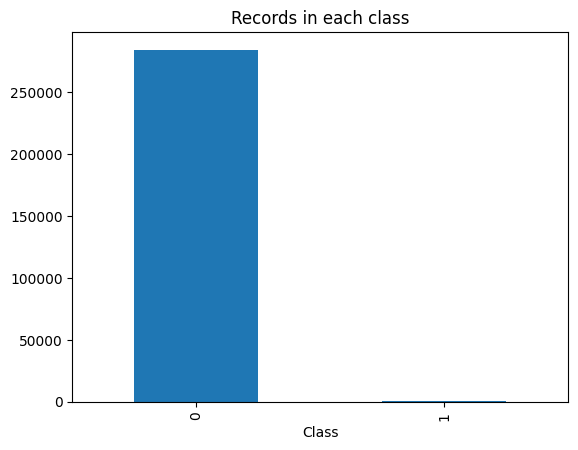

In [ ]:
count_classes = df['Class'].value_counts()
plt.title("Records in each class")
count_classes.plot.bar() # Check imbalance percentage

# **Fraud vs Non-Fraud Perc.**

In [ ]:
# Analysis - Percentage fraud and non-fraud transactions
fraud = len(df[df['Class'] == 1])
non_fraud = len(df[df['Class'] == 0])

print("Fraud transactions are as follows", round(fraud/len(df['Class'])*100,2),"%")
print("Normal transactions are as follows", round(non_fraud/len(df['Class'])*100,2),"%")

Fraud transactions are as follows 0.17 %
Normal transactions are as follows 99.83 %


In [ ]:
# Abs
df['Class'].value_counts()

,count
Class,
0,284315
1,492


## **Distribution Analysis**
Note:
1. If we need a yearly pattern, we need atleast 2 yrs data
2. If we need a monthly pattern, we need atleast 2 months data
3. If we need a day pattern, we need atleast 2 day's data
4. If we need hourly pattern, we need atleast 2 day's data

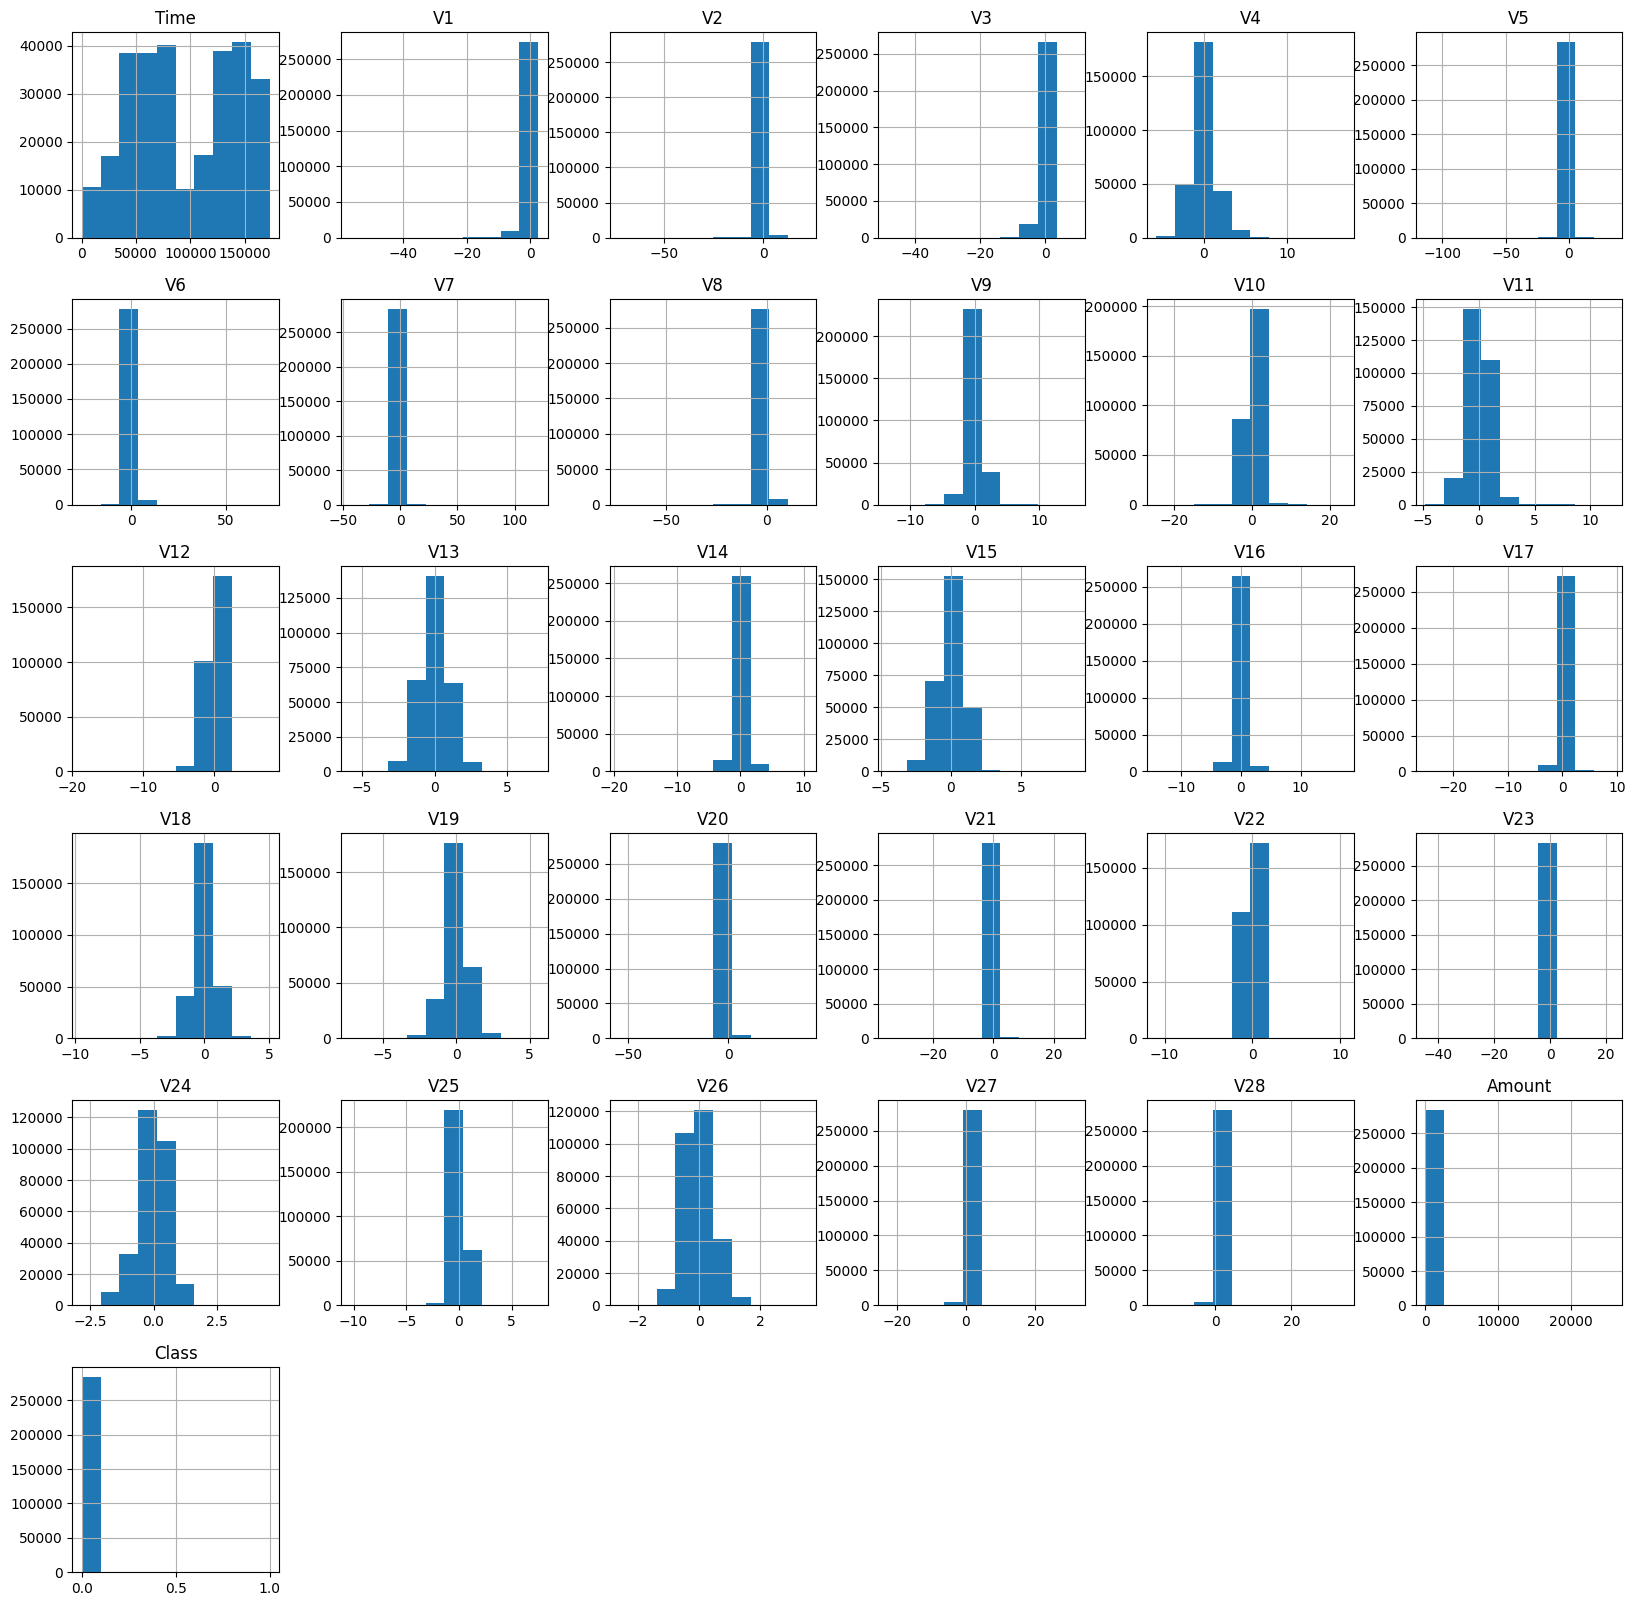

In [ ]:
df.hist(figsize=(20,20))
plt.show()

#Insights related to Time and Amount
# Time - has only 2 days of data so we can split it based on Weekend/Weekday or Day of the Week or hourly based on the use-case

Interesting Question: When you have an imbalanced data, how do you handle outliers?

hint: Having a fraud transaction might itself be an outlier in the transaction amount column

Logic: Handle imbalanced data

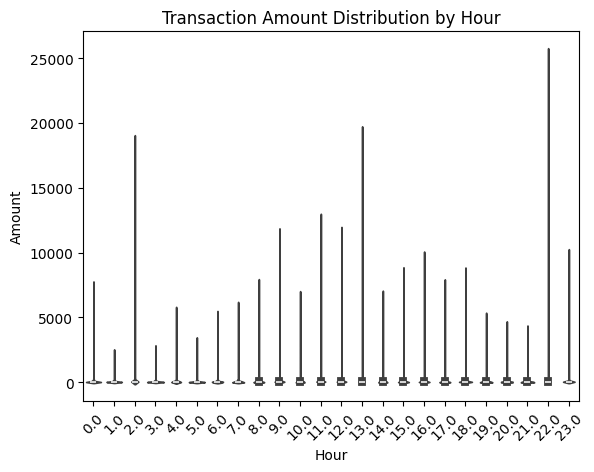

In [ ]:
# Ensure 'Hour' column is in the DataFrame
df['Hour'] = df['Time'] // 3600 % 24  # Convert 'Time' to 'Hour'
# This line calculates the 'Hour' column from the 'Time' column and adds it as a new column to the df.


# Now create the violin plot
sns.violinplot(x='Hour', y='Amount', data=df)
plt.title('Transaction Amount Distribution by Hour')
plt.xticks(rotation=45)
plt.show()

"From the boxplot, we observe that transaction amounts vary significantly throughout the day. The highest concentration of high-value transactions occurs between 8 and 17 hours and 22, 2 hours. Additionally, the presence of extreme outliers during certain hours might indicate a potential risk for fraudulent activities during these time periods."

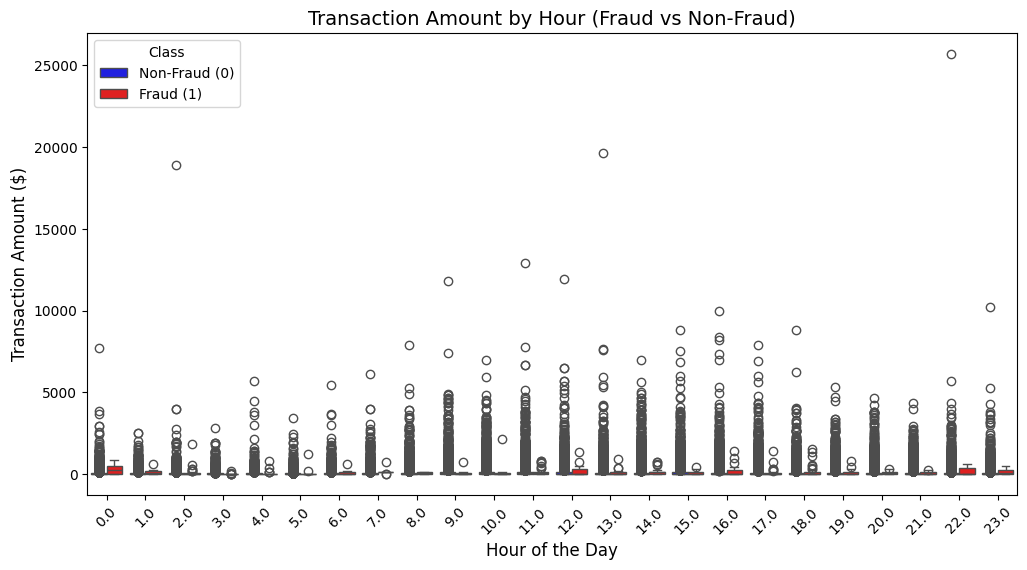

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Class' to categorical type for proper hue mapping
df['Class'] = df['Class'].astype(int)

# Define color palette explicitly for Fraud (red) and Non-Fraud (blue)
palette = {0: "blue", 1: "red"}

# Set figure size
plt.figure(figsize=(12,6))

# Boxplot with corrected colors
sns.boxplot(x='Hour', y='Amount', data=df, hue='Class',
            palette=palette, order=sorted(df['Hour'].unique()))

# Titles and labels
plt.title('Transaction Amount by Hour (Fraud vs Non-Fraud)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.xticks(rotation=45)

# Fix the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Non-Fraud (0)', 'Fraud (1)'], title='Class')

# Show plot
plt.show()

**Key Insight**: Fraud Transactions have no fixed hour, occur at unusual hours

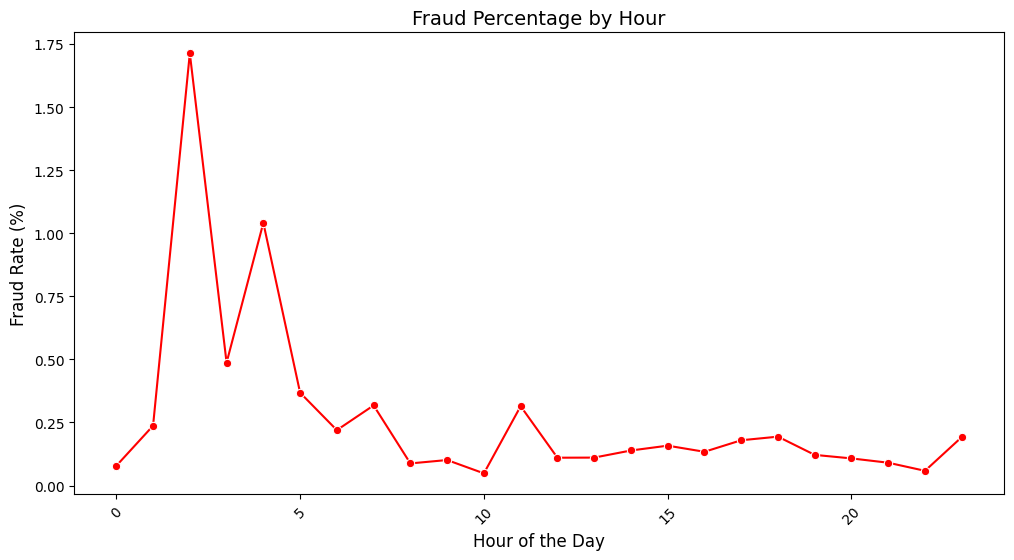

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate fraud percentage per hour
fraud_rates = df[df['Class'] == 1].groupby('Hour')['Class'].count() / df.groupby('Hour')['Class'].count()

# Plot the fraud rate by hour
plt.figure(figsize=(12,6))
sns.lineplot(x=fraud_rates.index, y=fraud_rates.values * 100, color='red', marker='o')  # Convert to percentage

# Titles and labels
plt.title('Fraud Percentage by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()

Why Fraud Rate is important?

## **Outlier Detection & Treatment** - Amount based on IQR Strategy
1. Lower Bound: Q1 - 1.5*IQR
2. Upper Bound: Q3 + 1.5*IQR
3. IQR = Q3 - Q1

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
def indices_of_outliers(x):
  q1, q3 = np.percentile(x, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  return np.where((x > upper_bound) | (x < lower_bound), "Y","N")

df['outliers'] = indices_of_outliers(df['Amount'])

len(df[df['outliers'] == 'Y'])

31904

Note: Given it's imbalanced data every action we take should be in % format

In [ ]:
# Fraud + outlier cases(Abs.)
len(df[(df['Class'] == 1) & (df['outliers'] == 'Y')])

91

In [ ]:
print("Fraud + outlier % cases are:", round((len(df[(df['Class'] == 1) & (df['outliers'] == 'Y')])/len(df[df['outliers'] == 'Y']))*100,2),"%")

Fraud + outlier % cases are: 0.29 %


In [ ]:
# Fraud + outlier cases(Abs.)
len(df[(df['Class'] == 0) & (df['outliers'] == 'Y')])

31813

In [ ]:
print("Non-Fraud + outlier % cases are:", round((len(df[(df['Class'] == 0) & (df['outliers'] == 'Y')])/len(df[df['outliers'] == 'Y']))*100,2),"%")

Non-Fraud + outlier % cases are: 99.71 %


KeyError: "None of [Index(['outliers'], dtype='object')] are in the [columns]"

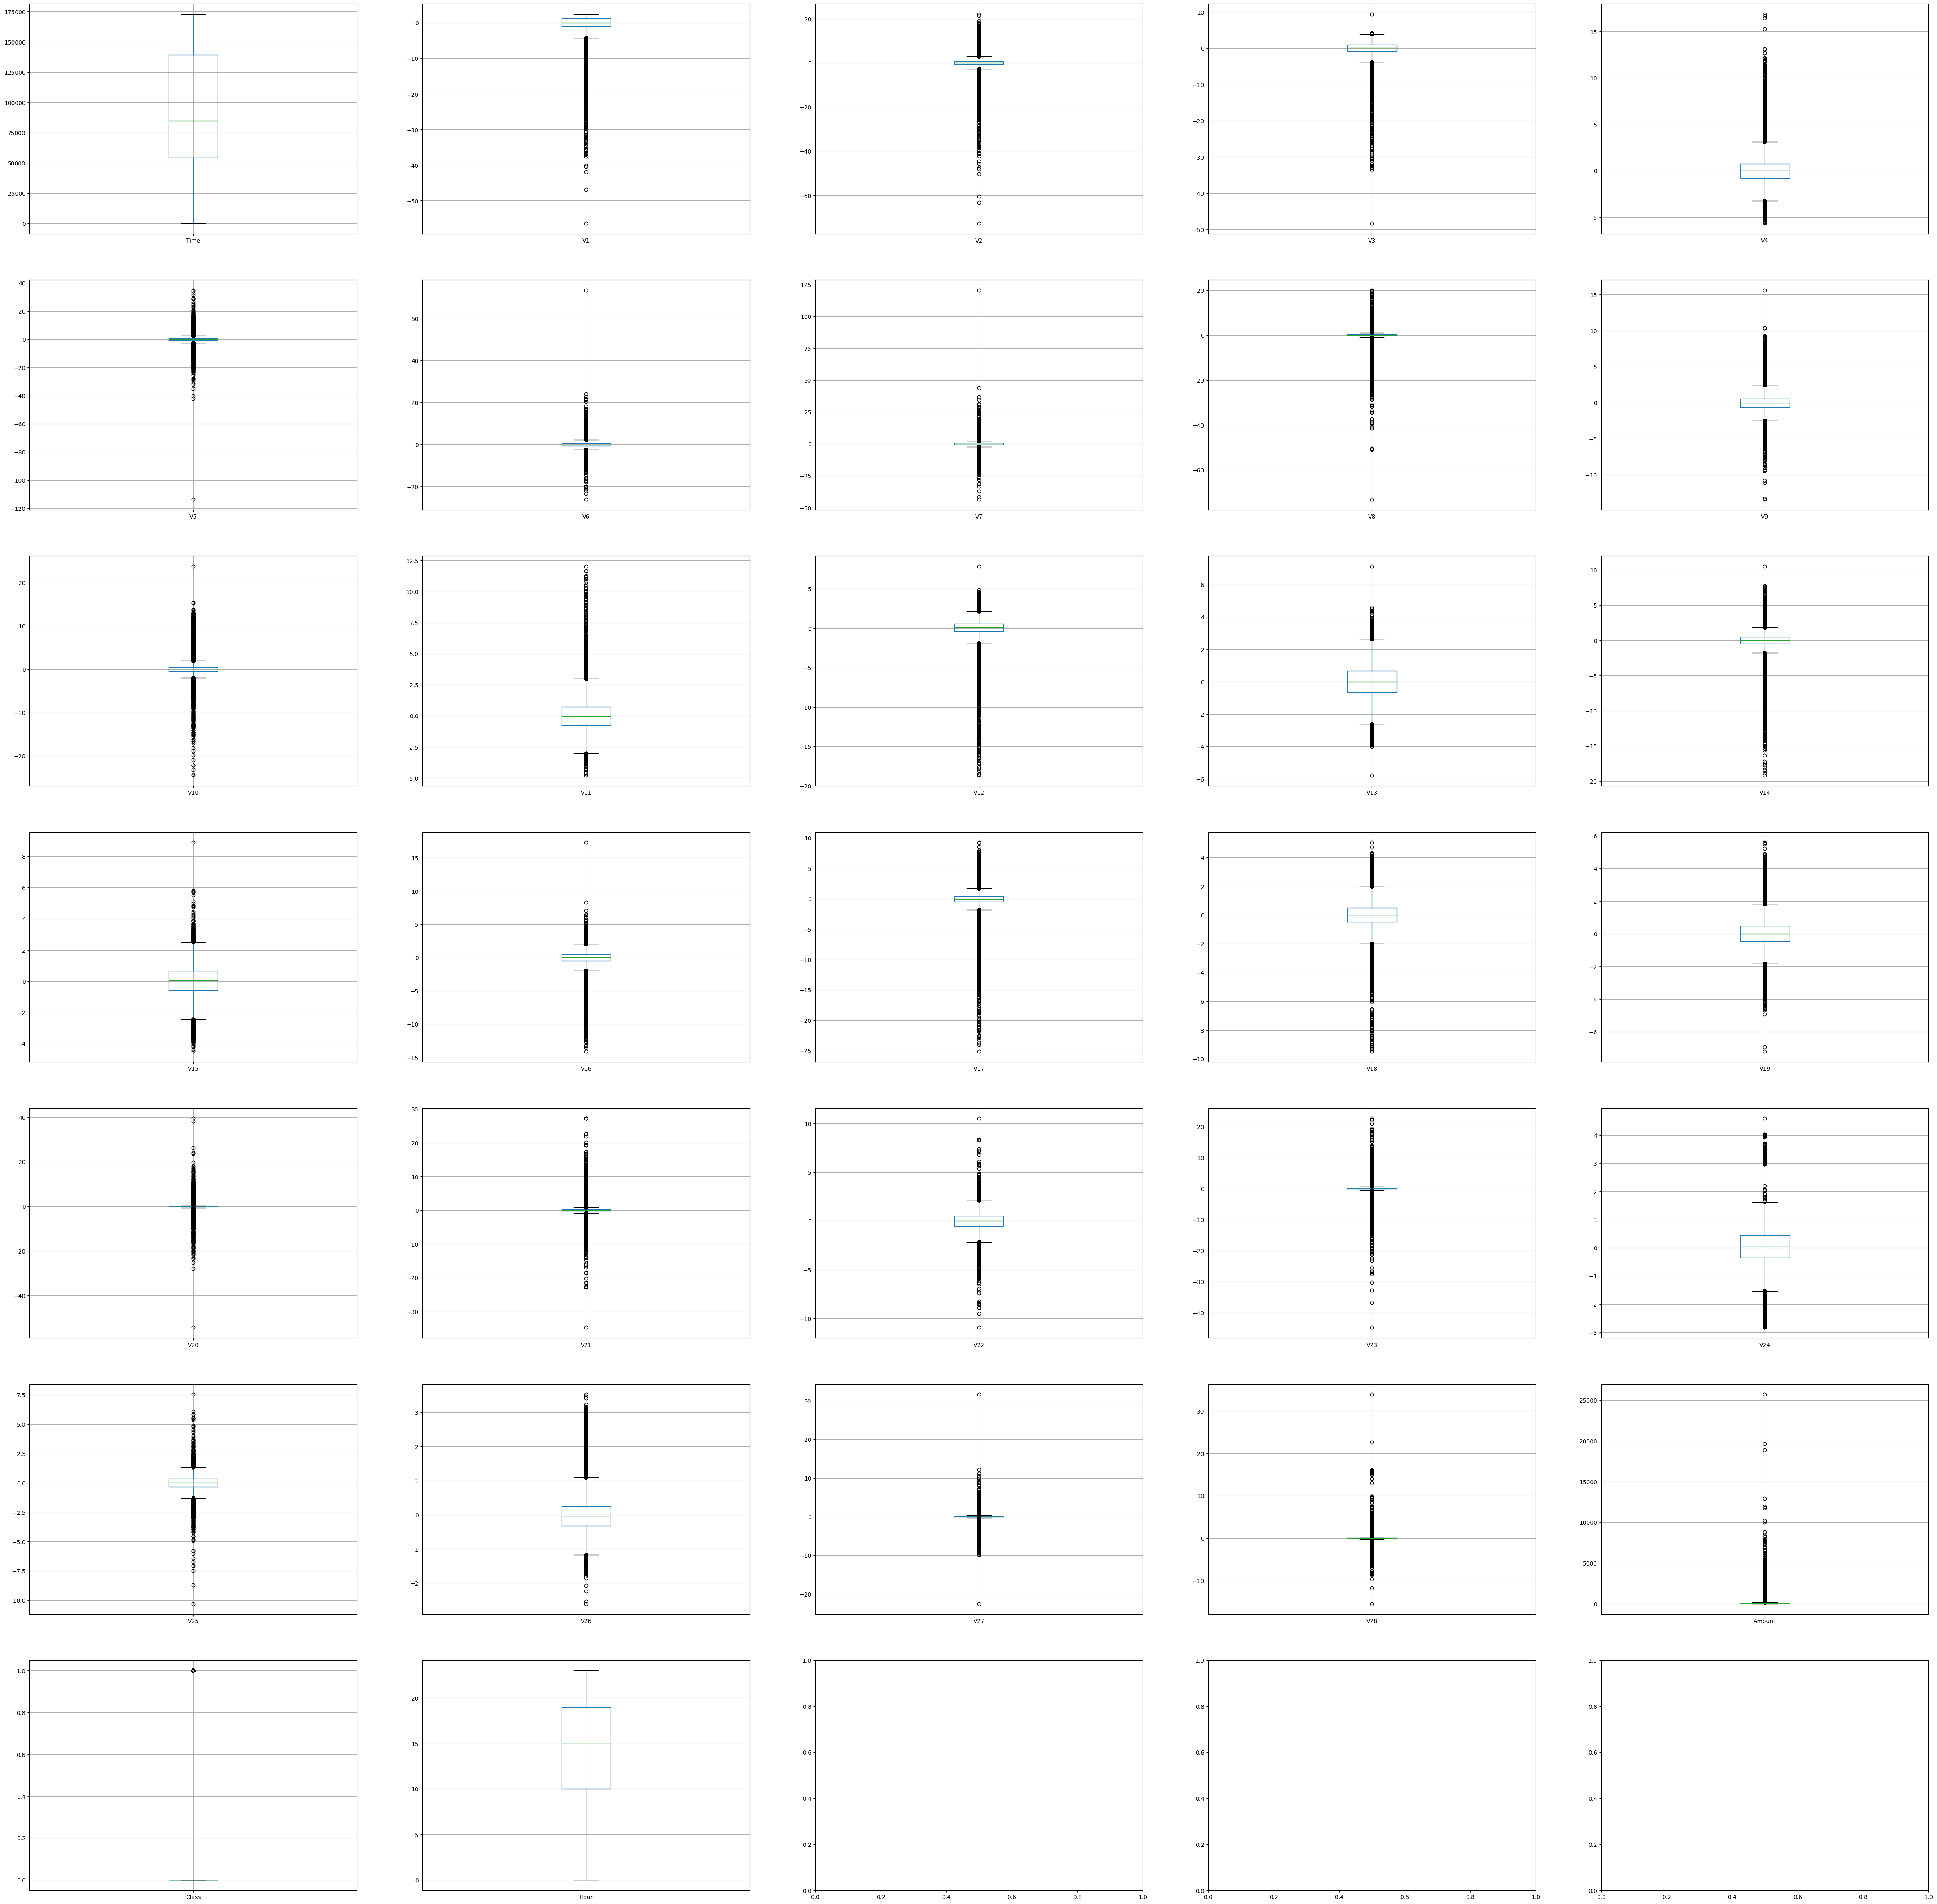

In [ ]:
fig, axs = plt.subplots(ncols = 5,nrows = 7, figsize=(60, 60))

for i, el in enumerate(list(df.columns.values)):
  a = df.boxplot(el, ax=axs.flatten()[i])

#No outliers in Time and Class

# **Random Under-Sampling**
1. Never test on over-sampled or undersampled datasets.
2. Don't use accuracy score as a metric with imbalanced datasets(will be usually high and misleading), instead use F1 score, Precision/Recall, Confusion Matrix
3. Lost lot of relevant data - only if you have not shuffled data before reducing majority class data

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes

In [ ]:
df = df.sample(frac = 1)

In [ ]:
# amount of fraud classess 492 rows
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

In [ ]:
new_df = pd.concat([fraud_df, non_fraud_df])

In [ ]:
revised_new_df = new_df.sample(frac=1, random_state=42)
revised_new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,outliers
57822,48091.0,-1.597754,-0.266872,3.157944,-0.355280,-1.062280,0.289359,-0.587351,0.471954,1.701661,...,-0.264010,0.525680,0.450118,1.201244,0.367255,0.275114,67.50,0,13.0,N
146790,87883.0,-1.360293,-0.458069,-0.700404,2.737229,-1.005106,2.891399,5.802537,-1.933197,-1.017717,...,0.580106,0.216927,0.151643,-0.332115,-0.469800,-1.495006,829.41,1,0.0,Y
194474,130601.0,-0.088465,-0.364616,0.871090,-2.510193,-0.679888,-0.968255,-0.075888,-0.075628,2.206607,...,0.146059,-0.001913,-0.848674,-0.995311,0.115960,0.166565,43.45,0,12.0,N
147605,88737.0,1.917827,0.951967,-2.059206,3.833998,1.668192,0.769826,0.232463,0.107941,-1.143646,...,-0.111916,-0.380576,0.370995,0.189117,-0.005823,-0.012105,9.21,1,0.0,N
149600,91554.0,-5.100256,3.633442,-3.843919,0.183208,-1.183997,1.602139,-3.005953,-8.645038,1.285458,...,1.090707,-0.159260,0.532156,-0.497126,0.943622,0.553581,261.22,1,1.0,Y


In [ ]:
#Equally distributed data
revised_new_df['Class'].value_counts()

,count
Class,
0,492
1,492


Random Over Sampling & SMOTE

## **Correlations** (After Random Undersampling)

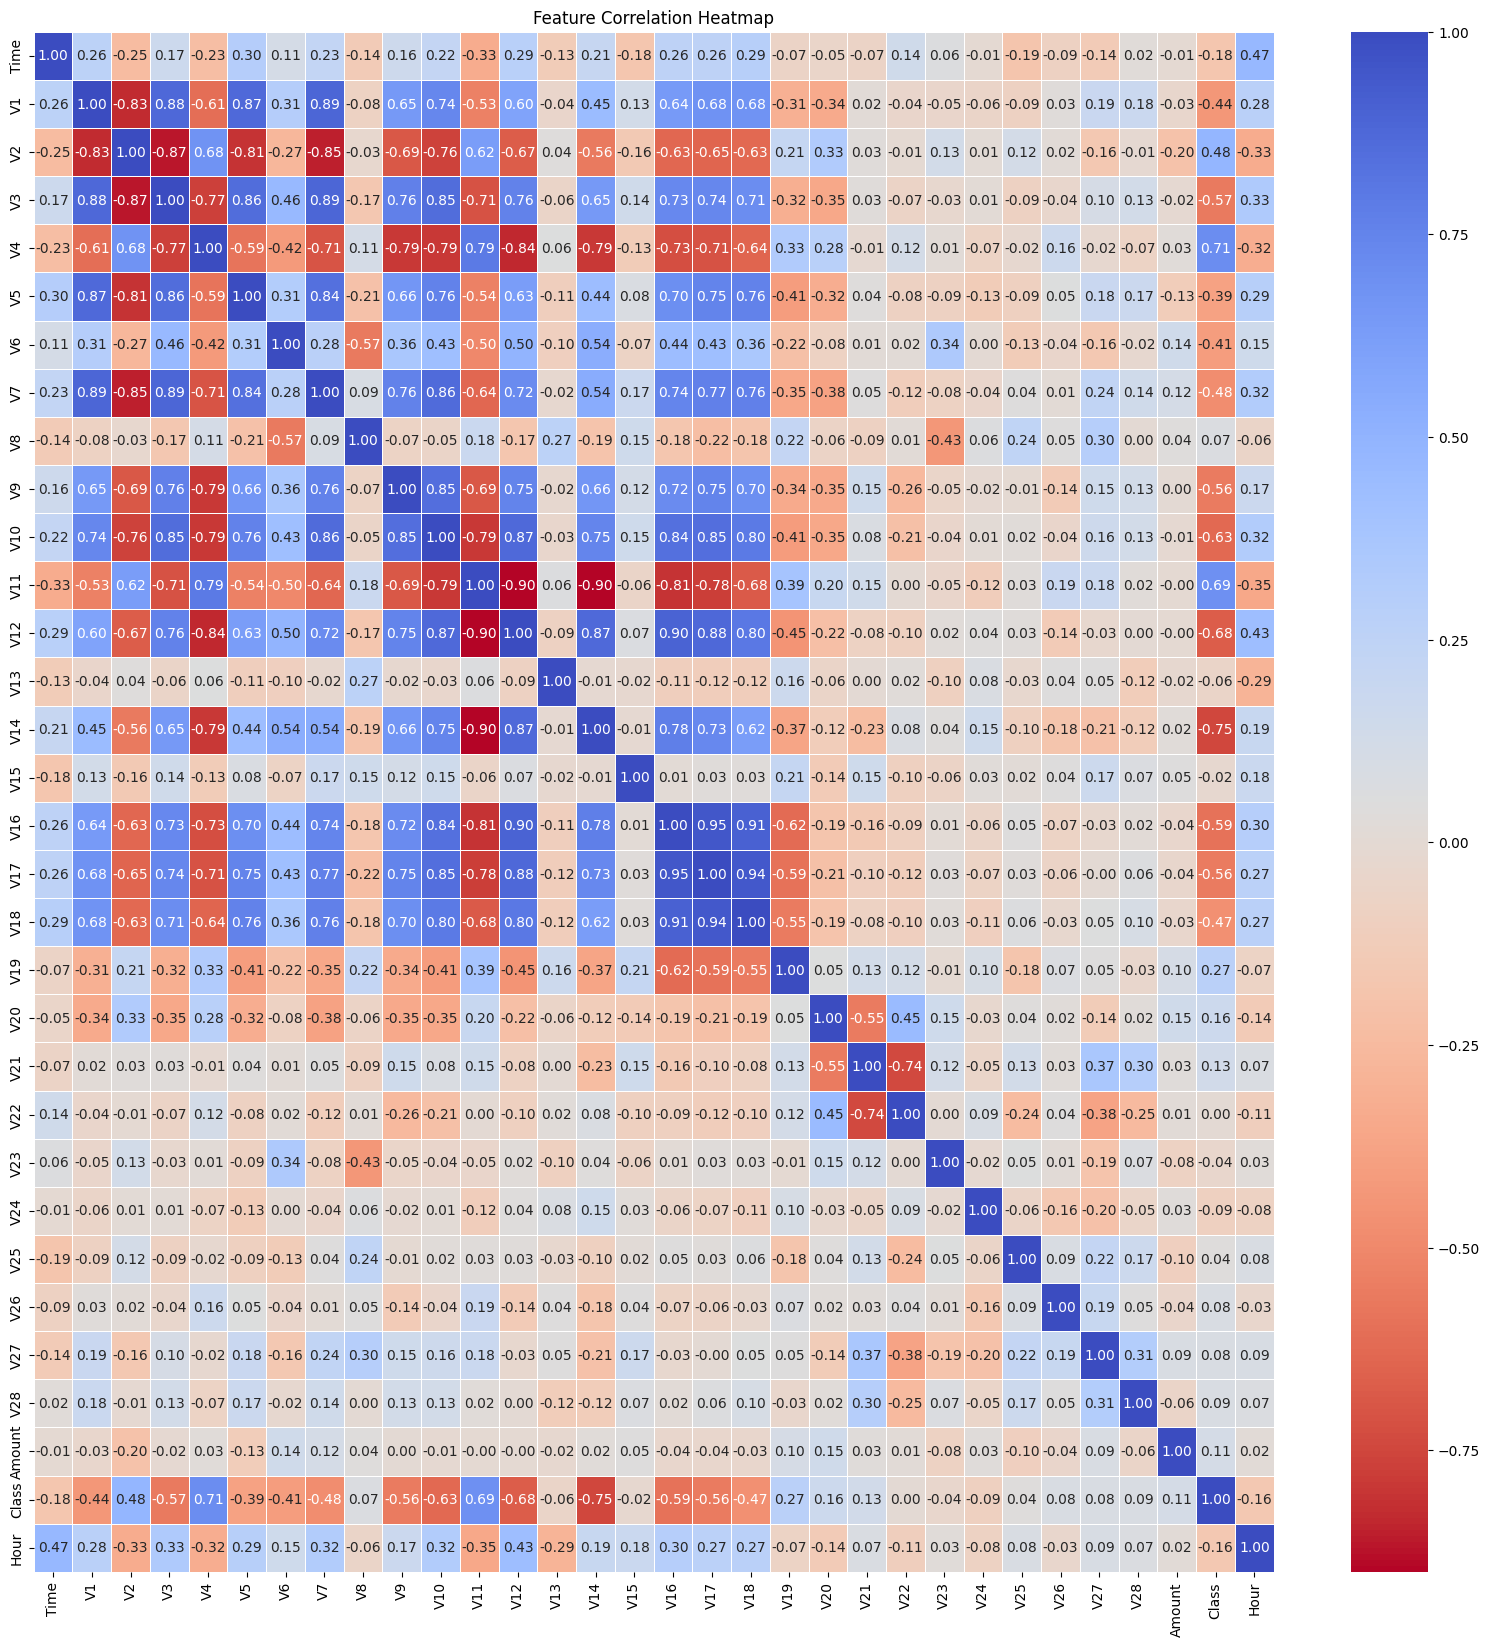

In [ ]:
# Fill NaN values in correlation matrix
# Exclude the 'outliers' column, which contains non-numeric values ('Y', 'N')
corr_matrix = revised_new_df.drop(columns=['outliers']).corr().fillna(0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.title("Feature Correlation Heatmap")
plt.show()

* Do you think 2 correlated column can cause harm on the model? - Yes,
multi-collinearity. Just longer time to converge, train and predict.
* If 2 values are correlated they may actually cause harm to the model only if you delete unnecessary column(Keep in mind which is more important)